Author: Alex Hamilton - https://github.com/alexhamiltonRN  
Created: 2018-10-19 1:07 PM  
Description: Assignment 2 - FFT and Filtering (Q's 2b and 2c)

In [1]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
print(sitk.Version())

SimpleITK Version: 1.1.0rc2 (ITK 4.13)
Compiled: Mar  7 2018 16:47:58



In [3]:
# Import t2 nifti file
root_dir = Path.cwd().parent
t2_path = root_dir.joinpath('local_data/generated/nifti/ProstateX-0002/t2/4_t2_tse_tra.nii.gz')
t2_original = sitk.ReadImage(str(t2_path))

In [4]:
# Convert to numpy array
t2_original_np = sitk.GetArrayFromImage(t2_original)

# Get a slice of the array (10th slice)
t2_slice_original = t2_original_np[9,:,:]

## 2DFFT

### 2b. Removing phase and reconstructing image
[Stackoverflow source](https://stackoverflow.com/questions/7763092/matlab-inverse-fft-from-phase-magnitude-only)

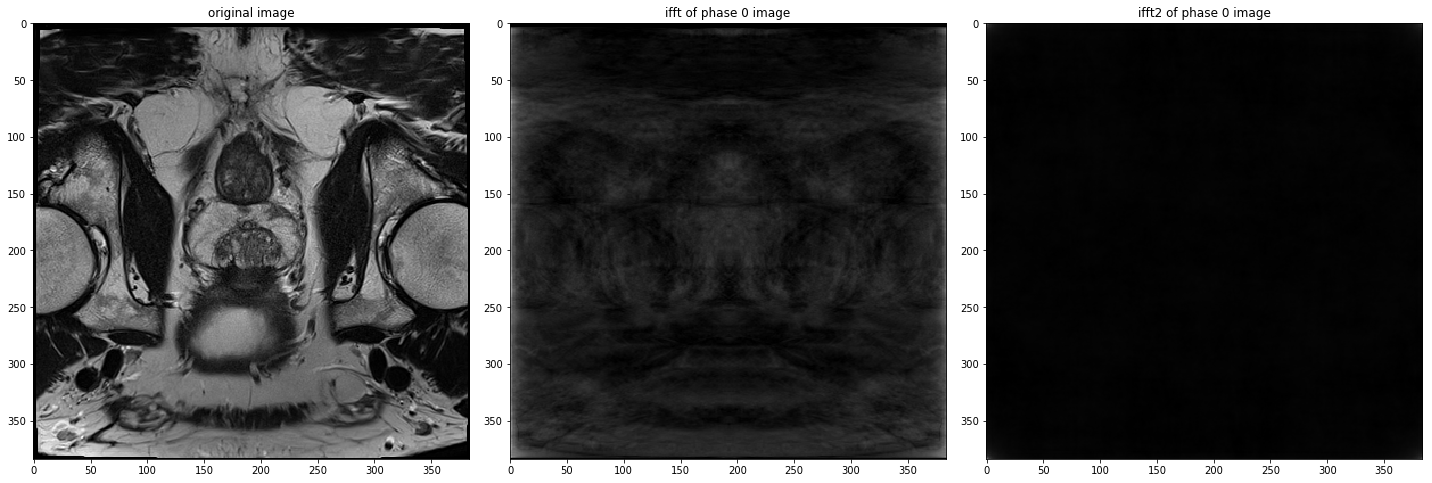

In [5]:
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
plt.title('original image')
plt.imshow(t2_slice_original, cmap = 'gray')

plt.subplot(1,3,2)
ft_t2_slice = np.fft.fft(t2_slice_original)
magnitude = np.abs(ft_t2_slice) # has the same magnitude as ft_t2_slice; 0 phase
inverse = np.fft.ifft(magnitude)
plt.title('ifft of phase 0 image')
plt.imshow(np.abs(inverse), cmap = 'gray')

plt.subplot(1,3,3)
ft_t2_slice = np.fft.fft2(t2_slice_original)
magnitude = np.abs(ft_t2_slice) # has the same magnitude as ft_t2_slice; 0 phase
inverse = np.fft.ifft2(magnitude)
plt.title('ifft2 of phase 0 image')
plt.imshow(np.abs(inverse), cmap = 'gray')
plt.tight_layout()

plots_path = root_dir.joinpath('local_data/images/ifft2_zero_phase.pdf')
plt.savefig(str(plots_path))
plt.show()

### Plotting fftshift

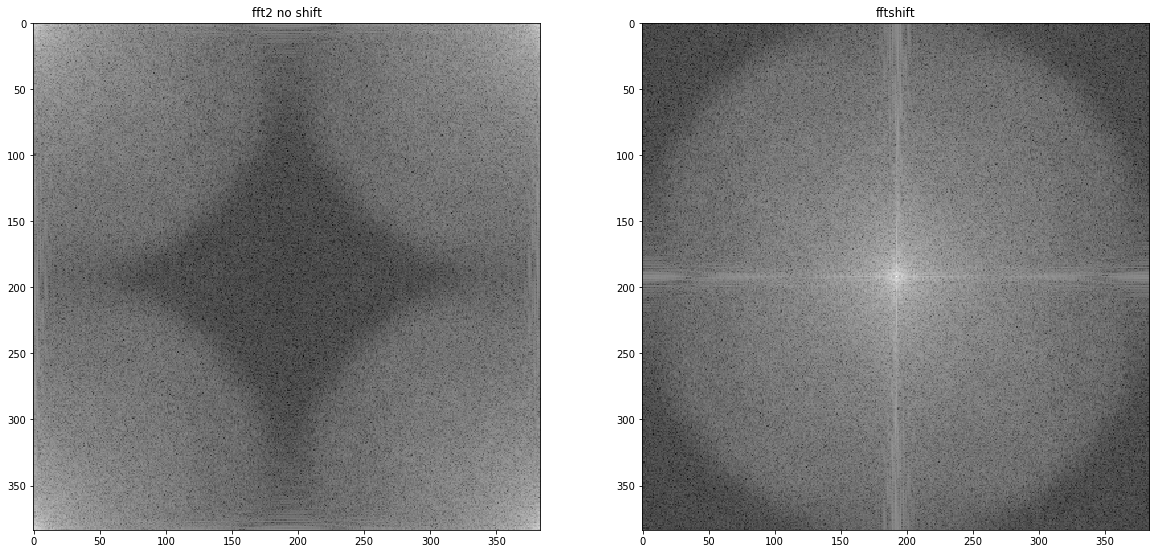

In [6]:
plt.figure(figsize=(20, 10))

plt.subplot(1,2,1)
ft_t2_slice = np.fft.fft2(t2_slice_original)
plt.title('fft2 no shift')
plt.imshow(np.log(np.abs(ft_t2_slice)), cmap = 'gray')

plt.subplot(1,2,2)
ft_t2_slice = np.fft.fft2(t2_slice_original)
ft_t2_slice = np.fft.fftshift(ft_t2_slice)
plt.title('fftshift')
plt.imshow(np.log(np.abs(ft_t2_slice)), cmap = 'gray')

plots_path = root_dir.joinpath('local_data/images/fft2_shift.pdf')
plt.savefig(str(plots_path))
plt.show()

### 2c. Laplacian (high pass- edge detection) filter in the frequency domain

Sources: 

- [OpenCV Tutorial](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html)
- [SciPy Tutorial](https://scipython.com/book/chapter-6-numpy/examples/blurring-an-image-with-a-two-dimensional-fft/)
- [Applying Filters in Frequency domain](https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Signal_Processing_with_NumPy_Fourier_Transform_FFT_DFT_2.php)

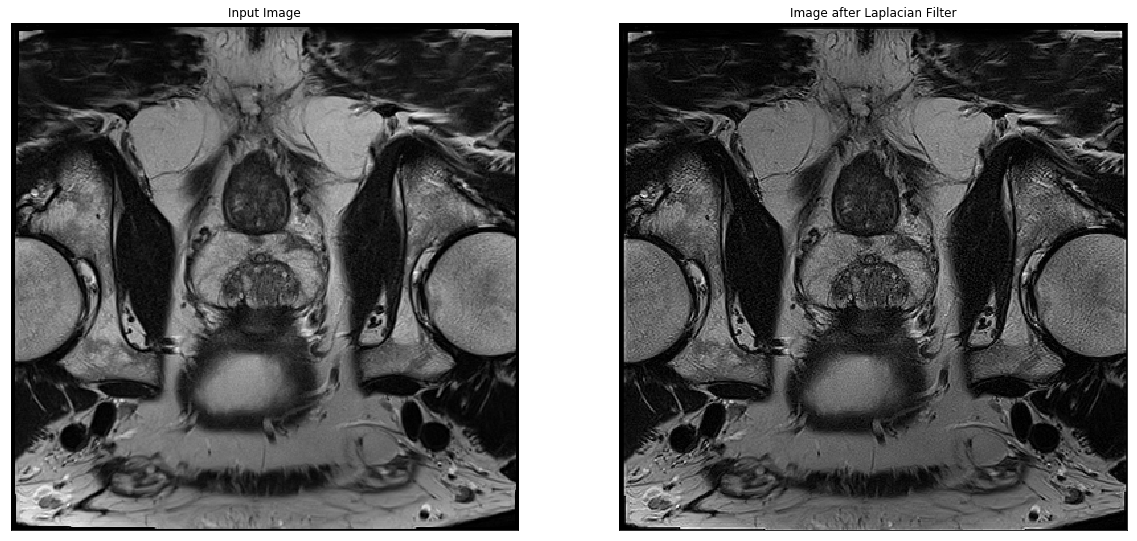

In [7]:
laplacian = np.array([[0, 5, 0],                   # Create laplacian
                      [5,-40,5],
                      [0, 5, 0]])

fft_laplacian = np.fft.fft2(laplacian, (384,384))   # take 2D FFT of laplacian filter

ft_t2_slice = np.fft.fft2(t2_slice_original)        # take 2D FFT of image
ft_t2_slice = ft_t2_slice * fft_laplacian           # apply filter

t2_slice_edges = np.fft.ifft2(ft_t2_slice)          # bring image back
t2_slice_edges = np.abs(t2_slice_edges)

plt.figure(figsize=(20, 10))

plt.subplot(1,2,1)
plt.title('Input Image')
plt.xticks([])
plt.yticks([])
plt.imshow(t2_slice_original, cmap = 'gray')

plt.subplot(1,2,2)
plt.title('Image after Laplacian Filter')
plt.xticks([])
plt.yticks([])
plt.imshow(t2_slice_edges, cmap = 'gray')

plots_path = root_dir.joinpath('local_data/images/laplacian_filter_freq.pdf')
plt.savefig(str(plots_path))
plt.show()